<h1>Insert Sort</h1>
<p>Imagine you're dealt a hand of cards, and you want to sort by rank.  The way most people do so is scanning left to right, and moving low ranked cards left as you find them.  This technique is calles insert sort, and is an example of an O(n^2) algorythm.  We'll start by creating this algorythm.</p>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from time import time

In [2]:
def insert_sort(l_in):
    for i in range(len(l_in)):
        # Create a 2nd index to itterate down as needed
        j = i
        while j > 0:
            #Check if the element to it's left is less than the current element
            if l_in[j-1] > l_in[j]:
                #Do an in place swap
                l_in[j], l_in[j-1] = l_in[j-1], l_in[j]
                #Itterate your 2nd index down
                j -= 1
            #Exit while loop
            else:
                break

In [3]:
#Unit test
l_test = [4, 1, 3, 2]
insert_sort(l_test)
print(l_test)

[1, 2, 3, 4]


<h2>Plotting time growth</h2>

In [4]:
n_in = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
n_sec = []
# Fit Arrays of various size, record time to perform fit
for n in n_in:
    start = time()
    l_in = np.random.randint(10000, size=n)
    insert_sort(l_in)
    n_sec.append(time()-start)

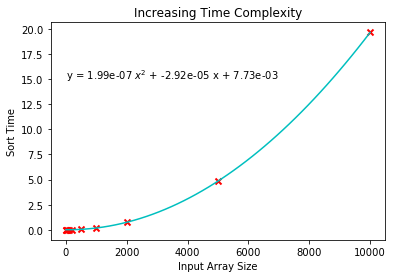

In [6]:
# Plot the data + line of best fit
fit = list(np.polyfit(n_in, n_sec, 2))

def polynomial(x, pars):
    return pars[2] + pars[1]*x + pars[0]*x*x

line_sp = np.linspace(0, 10000)
line_fit = [polynomial(x, fit) for x in line_sp]

plt.figure()
plt.scatter(n_in, n_sec, color='r', marker='x', lw=2)
plt.plot(line_sp, line_fit, color='c')
plt.xlabel('Input Array Size')
plt.ylabel('Sort Time')
plt.title('Increasing Time Complexity')
plt.text(0, 15, r"y = {0:0.2e} $x^2$ + {1:0.2e} x + {2:0.2e}".format(fit[0], fit[1], fit[2]))
plt.show()